In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("csgo_round_snapshots.csv")

datamapset = list(set(data.map)) #получаем лист возможных вариантов для столбца map
datamapdict = {i:datamapset.index(i) for i in datamapset} #создаем словарь ключ строка значение число
data["map"] = data["map"].map(lambda x: datamapdict[x]) #заменяем строковые значения на числовые

data.bomb_planted = data.bomb_planted.map(lambda x: str(x)) #приводим значения к строковому виду (from numpy.bool)
dataplantset = list(set(data.bomb_planted)) #получаем лист возможных вариантов для столбца bomb_planted
dataplantdict = {i:dataplantset.index(i) for i in dataplantset} #создаем словарь ключ строка значение число
data.bomb_planted = data.bomb_planted.map(lambda x: dataplantdict[x]) #заменяем строковые значения на числовые

data.round_winner = data.round_winner.map(lambda x:0 if x=="CT" else 1) #заменяем строковые значения на числовые

In [3]:
X_train, X_test = data.iloc[:100000,:-1], data.iloc[100000:,:-1]  
y_train, y_test = data.iloc[:100000,-1], data.iloc[100000:,-1] #разбиваем датасет на обучающую и тестовую выборку

In [4]:
neighbors_list = [] 
accuracy_list = [] 
for n_neighbors in [i*10 for i in range(1, 20)]:
    """
    БЛОК ДЛЯ ПОДБОРА ОПТИМАЛЬНОГО ЗНАЧЕНИЯ ДЛЯ ГИПЕРМАРАМЕТРА N_NEIGHBORS 
    """
    print(n_neighbors)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    neighbors_list.append(n_neighbors)
    accuracy_list.append(accuracy) 

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


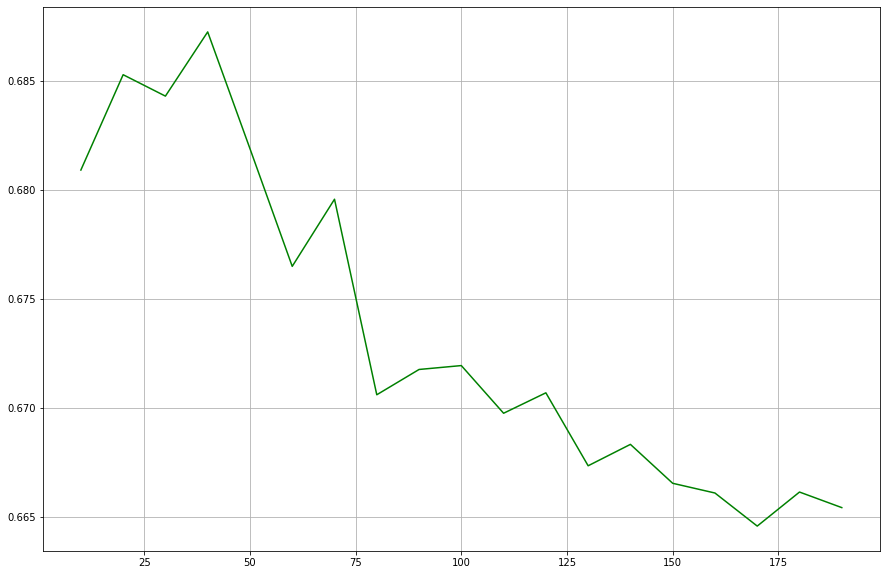

In [5]:
plt.rcParams["figure.figsize"] = 15,10
plt.plot(neighbors_list, accuracy_list, c = "green")
plt.grid()

In [6]:
model = KNeighborsClassifier(n_neighbors=40)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.6872378402498884